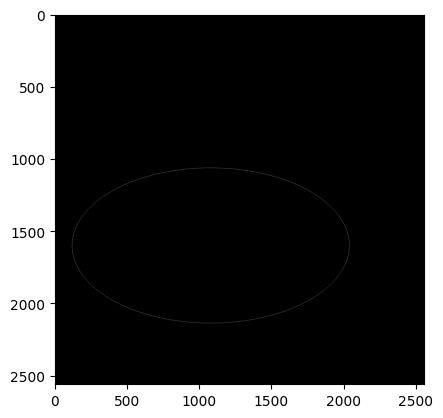

In [1]:
import numpy as np
from skimage import draw
import math

def ellipse_to_numpy(svg_data, image_width, image_height, mask_class):
    x0 = svg_data['x0']
    y0 = svg_data['y0']
    x1 = svg_data['x1']
    y1 = svg_data['y1']
    
    # Calculate the radius of the circle (r)
    r = math.sqrt((x1 - x0)**2 + (y1 - y0)**2)
    
    # Calculate the radius in x-direction (r_radius)
    r_radius = abs(x1 - x0)
    
    # Calculate the radius in y-direction (c_radius)
    c_radius = abs(y1 - y0)
    
    # Center of the circle (cx, cy)
    cx = x0
    cy = y0
    
    # Adjust center coordinates to fit within the image bounds
    cx = max(min(int(cx), image_width - 1), 0)
    cy = max(min(int(cy), image_height - 1), 0)
    
    r, cx, cy, r_radius, c_radius = int(r), cx, cy, int(r_radius), int(c_radius)

    # Scale the radius if needed to fit within the image bounds
    max_radius = min(cx, cy, image_width - cx, image_height - cy)
    r_radius = min(r_radius, max_radius)
    c_radius = min(c_radius, max_radius)

    # Create the image and draw the circle
    mask = np.zeros((image_width, image_height))-1
    rr, cc = draw.ellipse_perimeter(cy, cx, r_radius, c_radius)
    
    # Ensure indices are within valid image bounds
    rr = np.clip(rr, 0, image_height-1)
    cc = np.clip(cc, 0, image_width-1)
    
    mask[rr, cc] = mask_class
    return mask

svg_data = {
    'x0': 1077.399659846864,
    'y0': 1601.2293663808737,
    'x1': 540.1809853144262,
    'y1': 24.60934329654583
}
image_width, image_height = 2560, 2560
mask_class = 1

mask = ellipse_to_numpy(svg_data, image_width, image_height, mask_class)

import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray')
plt.show()


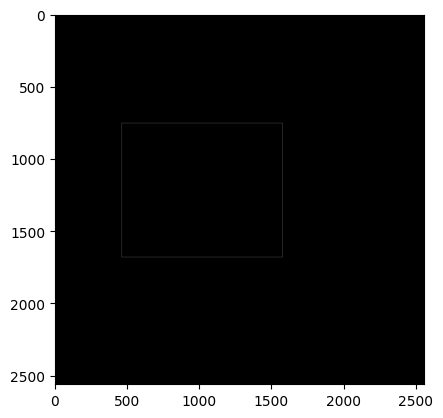

In [2]:
import numpy as np
from skimage import draw

def rectangle_to_numpy(svg_data, image_width, image_height, svg_class):
    x0 = svg_data['x0']
    y0 = svg_data['y0']
    x1 = svg_data['x1']
    y1 = svg_data['y1']
    
    # Adjust coordinates to fit within the image bounds
    x0 = max(min(x0, image_width - 1), 0)
    y0 = max(min(y0, image_height - 1), 0)
    x1 = max(min(x1, image_width - 1), 0)
    y1 = max(min(y1, image_height - 1), 0)
    
    # Draw the rectangle
    mask = np.zeros((image_width, image_height))-1
    rr, cc = draw.rectangle_perimeter(start=(y0, x0), end=(y1, x1), shape=mask.shape, clip=True)
    mask[rr, cc] = svg_class
    return mask

svg_data = {
    'x0': 461.9516129032258,
    'y0': 755.1129032258065,
    'x1': 1572.6612903225807,
    'y1': 1680.016129032258
}
image_width, image_height = 2560, 2560
mask_class = 1

mask = rectangle_to_numpy(svg_data, image_width, image_height, mask_class)

import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray')
plt.show()


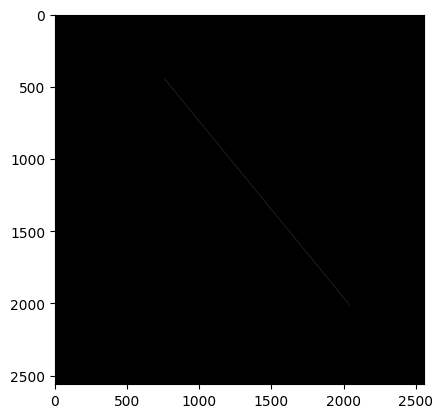

In [3]:
import numpy as np
from skimage import draw

def line_to_numpy(svg_data, image_width, image_height, mask_class):
    x0 = svg_data['x0']
    y0 = svg_data['y0']
    x1 = svg_data['x1']
    y1 = svg_data['y1']
    
    # Adjust coordinates to fit within the image bounds
    x0 = max(min(int(x0), image_width - 1), 0)
    y0 = max(min(int(y0), image_height - 1), 0)
    x1 = max(min(int(x1), image_width - 1), 0)
    y1 = max(min(int(y1), image_height - 1), 0)
    
    # Draw the line
    mask = np.zeros((image_width, image_height))-1
    rr, cc = draw.line(y0, x0, y1, x1)
    mask[rr, cc] = mask_class
    return mask


svg_data = {
    'x0': 755.1129032258065,
    'y0': 445.43548387096774,
    'x1': 2039.241935483871,
    'y1': 2014.467741935484
}
image_width, image_height = 2560, 2560
mask_class = 1

mask = line_to_numpy(svg_data, image_width, image_height, mask_class)

import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray')
plt.show()


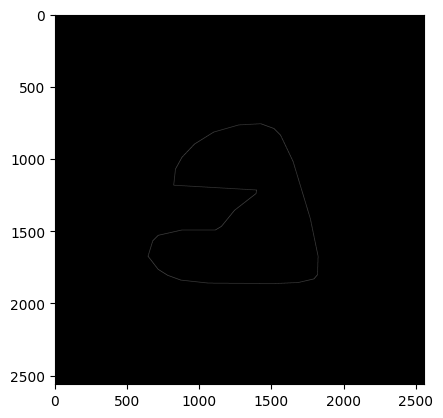

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from svgpathtools import parse_path

def path_to_numpy(svg_data, image_width, image_height, svg_class):
    path_data = svg_data['path']
    path = parse_path(path_data)
    
    # Create an empty image
    mask = np.zeros((image_width, image_height))-1
    
    # Convert SVG path to points and draw on the image
    for curve in path:
        for t in np.linspace(0, 1, 1000):
            x, y = curve.point(t).real, curve.point(t).imag
            x = max(min(int(x), image_width - 1), 0)
            y = max(min(int(y), image_height - 1), 0)
            mask[y, x] = svg_class
    
    return mask

svg_data = {
    'path': 'M821.1774193548387,1184.532258064516L833.5645161290323,1073.0483870967741L878.983870967742,990.4677419354839L965.6935483870968,899.6290322580645L1097.8225806451612,817.0483870967741L1271.241935483871,767.5L1424.016129032258,759.241935483871L1514.8548387096773,792.2741935483871L1560.274193548387,837.6935483870968L1646.983870967742,1019.3709677419355L1766.725806451613,1415.758064516129L1820.4032258064517,1675.8870967741937L1816.274193548387,1803.8870967741937L1791.5,1832.7903225806451L1684.1451612903227,1857.5645161290322L1506.5967741935483,1865.8225806451612L1060.6612903225807,1861.6935483870968L870.7258064516129,1841.0483870967741L779.8870967741935,1808.016129032258L713.8225806451613,1766.725806451613L643.6290322580645,1675.8870967741937L676.6612903225806,1568.532258064516L713.8225806451613,1531.3709677419354L878.983870967742,1494.2096774193549L1110.2096774193549,1494.2096774193549L1151.5,1469.4354838709678L1242.3387096774193,1357.9516129032259L1390.983870967742,1242.3387096774193L1395.1129032258063,1217.5645161290322Z'
}
image_width, image_height = 2560, 2560
mask_class = 1

img = path_to_numpy(svg_data, image_width, image_height, mask_class)

# Display the image
plt.imshow(img, cmap='gray')
plt.show()


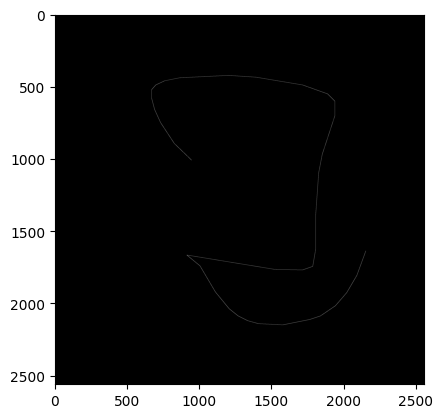

In [5]:
svg_data = {
    'path': 'M945.0483870967741,1011.1129032258065L825.3064516129032,895.5L730.3387096774194,750.983870967742L689.0483870967741,660.1451612903226L668.4032258064516,581.6935483870968L668.4032258064516,523.8870967741935L697.3064516129032,490.85483870967744L759.241935483871,461.9516129032258L862.4677419354839,441.30645161290323L1201.0483870967741,424.7903225806452L1390.983870967742,437.1774193548387L1713.0483870967741,490.85483870967744L1886.467741935484,552.7903225806451L1936.016129032258,602.3387096774194L1936.016129032258,705.5645161290323L1849.3064516129032,969.8225806451613L1824.532258064516,1097.8225806451612L1803.8870967741937,1386.8548387096773L1803.8870967741937,1626.3387096774193L1783.241935483871,1746.0806451612902L1713.0483870967741,1770.8548387096773L1518.983870967742,1766.725806451613L912.016129032258,1667.6290322580646L1002.8548387096774,1741.9516129032259L1110.2096774193549,1923.6290322580646L1205.1774193548388,2039.241935483871L1267.1129032258063,2088.7903225806454L1333.1774193548388,2121.8225806451615L1407.5,2142.467741935484L1576.7903225806451,2150.7258064516127L1762.5967741935483,2113.564516129032L1836.9193548387098,2088.7903225806454L1940.1451612903227,2018.5967741935483L2018.5967741935483,1927.758064516129L2088.7903225806454,1808.016129032258L2150.7258064516127,1638.725806451613'
}
image_width, image_height = 2560, 2560
mask_class = 1

mask = path_to_numpy(svg_data, image_width, image_height, mask_class)

# Display the image
plt.imshow(mask, cmap='gray')
plt.show()


In [6]:
annotation_data = {'dragmode': 'drawcircle', 'visible': True, 'annotations': {'0': [{'editable': True, 'label': {'text': '', 'texttemplate': ''}, 'xref': 'x', 'yref': 'y', 'layer': 'above', 'opacity': 1, 'line': {'color': 'rgba(240, 62, 62, 0.3)', 'width': 5, 'dash': 'solid'}, 'type': 'path', 'path': 'M614.7258064516129,441.30645161290323L684.9193548387096,503.241935483871L862.4677419354839,635.3709677419355L1002.8548387096774,812.9193548387096'}, {'editable': True, 'label': {'text': '', 'texttemplate': ''}, 'xref': 'x', 'yref': 'y', 'layer': 'above', 'opacity': 1, 'line': {'color': '#ae3ec9', 'width': 5, 'dash': 'solid'}, 'fillcolor': 'rgba(174, 62, 201, 0.3)', 'fillrule': 'evenodd', 'type': 'path', 'path': 'M631.241935483871,1114.3387096774193L664.2741935483871,1122.5967741935483L883.1129032258065,1341.4354838709678L920.2741935483871,1411.6290322580646L912.016129032258,1481.8225806451612L767.5,1622.2096774193549L668.4032258064516,1692.4032258064517L536.2741935483871,1680.016129032258L445.43548387096774,1659.3709677419354L296.7903225806452,1490.0806451612902L276.14516129032256,1403.3709677419354L284.4032258064516,1238.2096774193549L280.2741935483871,1213.4354838709678Z'}, {'editable': True, 'label': {'text': '', 'texttemplate': ''}, 'xref': 'x', 'yref': 'y', 'layer': 'above', 'opacity': 1, 'line': {'color': '#7048e8', 'width': 5, 'dash': 'solid'}, 'fillcolor': 'rgba(112, 72, 232, 0.3)', 'fillrule': 'evenodd', 'type': 'circle', 'x0': 1986.960521771868, 'y0': 852.7719633160631, 'x1': 1216.1685104861965, 'y1': -11.449382670901628}, {'editable': True, 'label': {'text': '', 'texttemplate': ''}, 'xref': 'x', 'yref': 'y', 'layer': 'above', 'opacity': 1, 'line': {'color': '#1c7ed6', 'width': 5, 'dash': 'solid'}, 'fillcolor': 'rgba(28, 126, 214, 0.3)', 'fillrule': 'evenodd', 'type': 'rect', 'x0': 1572.6612903225807, 'y0': 1184.532258064516, 'x1': 2059.8870967741937, 'y1': 1498.3387096774193}, {'editable': True, 'label': {'text': '', 'texttemplate': ''}, 'xref': 'x', 'yref': 'y', 'layer': 'above', 'opacity': 1, 'line': {'color': '#f59f00', 'width': 5, 'dash': 'solid'}, 'type': 'line', 'x0': 1201.0483870967741, 'y0': 1465.3064516129032, 'x1': 1457.0483870967741, 'y1': 2014.467741935484}], '1': [{'editable': True, 'label': {'text': '', 'texttemplate': ''}, 'xref': 'x', 'yref': 'y', 'layer': 'above', 'opacity': 1, 'line': {'color': 'rgba(245, 159, 0, 0.3)', 'width': 5, 'dash': 'solid'}, 'fillcolor': 'rgba(245, 159, 0, 0.3)', 'fillrule': 'evenodd', 'type': 'circle', 'x0': 1591.7975367139343, 'y0': 1575.1095137551001, 'x1': 248.75085038283976, 'y1': 430.600163664255}]}, 'image_shapes': [[2560, 2560], [2560, 2560], [965, 965], [480, 640]]}

Freeform
Closed Freeform
Ellipse
Rectangle
Line
Ellipse


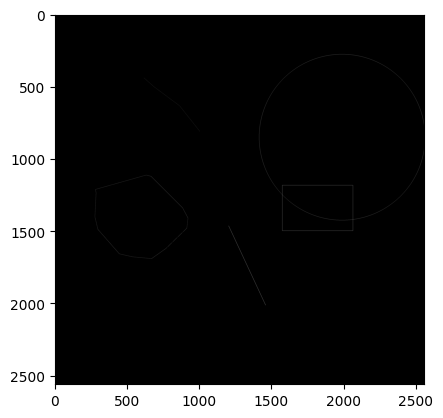

In [7]:

map_color_to_class = {
    "rgba(240, 62, 62, 0.3)": 0,
    "#ae3ec9": 1,
    "#7048e8": 2,
    "#1c7ed6": 3,
    "#f59f00": 4,
    "rgba(245, 159, 0, 0.3)": 5
}

def get_annotation_type(annotation):
    """
    This function returns readable annotation type name.
    """
    annotation_type = annotation["type"]

    if annotation_type == "path" and "fillrule" in annotation:
        annot = "Closed Freeform"
    elif annotation_type == "path":
        annot = "Freeform"
    elif annotation_type == "rect":
        annot = "Rectangle"
    elif annotation_type == "circle":
        annot = "Ellipse"
    elif annotation_type == "line":
        annot = "Line"
    else:
        annot = "Unknown"

    return annot

project_masks = []
for key, slice_data in annotation_data["annotations"].items():
    image_width, image_height = annotation_data["image_shapes"][0]
    slice_mask = np.zeros([image_width, image_height])-1
    for shape in slice_data:
        mask_class = map_color_to_class[shape["line"]["color"]]
        shape_type = get_annotation_type(shape)
        print(shape_type)
        if shape_type == "Closed Freeform" or shape_type == "Freeform":
            shape_mask = path_to_numpy(shape, image_width, image_height, mask_class)
        elif shape_type == "Rectangle":
            shape_mask = rectangle_to_numpy(shape, image_width, image_height, mask_class)
        elif shape_type == "Ellipse":
            shape_mask = ellipse_to_numpy(shape, image_width, image_height, mask_class)
        elif shape_type == "Line":
            shape_mask = line_to_numpy(shape, image_width, image_height, mask_class)
        else:
            continue
        slice_mask[shape_mask > -1] = shape_mask[shape_mask > -1]
        # slice_mask = np.where(shape_mask==-1, shape_mask, shape_mask)
    project_masks.append(slice_mask)

# save masks to napari-compatible file
np.save('project_masks.npy', project_masks)


first_slice_mask = project_masks[0]
plt.imshow(first_slice_mask, cmap='gray')
plt.show()